In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as LR

In [7]:
spy = pd.read_csv('SPY.csv')
aapl = pd.read_csv('AAPL.csv')
jpm = pd.read_csv('JPM.csv')

In [8]:
print(spy.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-08-20  285.570007  285.970001  285.059998  285.670013  260.555939   
1  2018-08-21  286.250000  287.309998  285.709991  286.339996  261.166962   
2  2018-08-22  285.880005  286.760010  285.579987  286.170013  261.011993   
3  2018-08-23  285.970001  286.940002  285.429993  285.790009  260.665375   
4  2018-08-24  286.440002  287.670013  286.380005  287.510010  262.234131   

     Volume  
0  39807500  
1  67272000  
2  44993300  
3  49204900  
4  57487400  


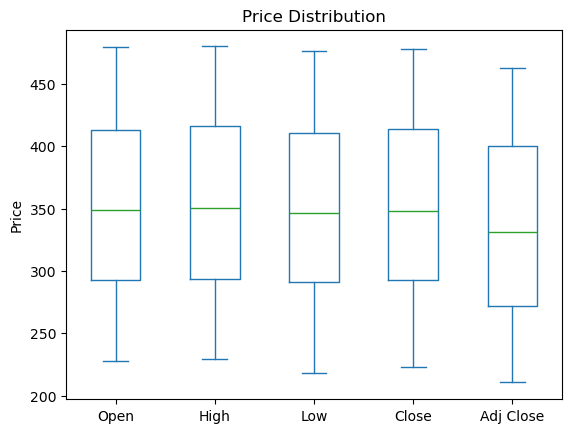

In [11]:
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close']
spy[cols].plot.box()
plt.title('Price Distribution')
plt.ylabel('Price')
plt.figsize=(15, 10)
plt.show()

In [19]:
adj_close = pd.DataFrame({'SPY': spy['Adj Close'],
                          'AAPL': aapl['Adj Close'],
                          'JPM': jpm['Adj Close']})

adj_close_pct_change = adj_close.pct_change()

adj_close_pct_change = adj_close_pct_change.dropna()

print(adj_close_pct_change.head())

        SPY      AAPL       JPM
1  0.002345 -0.001950  0.006107
2 -0.000593  0.000047 -0.003035
3 -0.001328  0.002046 -0.002087
4  0.006018  0.003109 -0.000436
5  0.007896  0.008235  0.017701


In [21]:
y = adj_close_pct_change['AAPL'][1:].array
x = adj_close_pct_change['SPY'][1:].array.reshape(-1, 1)
model2 = LR().fit(x, y)

print(f"beta: {model2.coef_}")

beta: [1.26017822]


In [24]:
historical_JPM_AAPL = adj_close_pct_change[['JPM', 'AAPL']][1:101]
future_JPM_AAPL = adj_close_pct_change[['JPM', 'AAPL']][101:]

hist_mean = pd.DataFrame.mean(historical_JPM_AAPL)
hist_std = pd.DataFrame.std(historical_JPM_AAPL)

historical_stats = hist_mean.to_frame()
historical_stats.columns = ['historical mean']
historical_stats['historical std'] = hist_std.to_frame()
print(historical_stats)

      historical mean  historical std
JPM         -0.001022        0.014014
AAPL        -0.003288        0.024107


In [25]:
R_2 = np.corrcoef(historical_JPM_AAPL['JPM'], historical_JPM_AAPL['AAPL'])
print(R_2)

[[1.         0.58520725]
 [0.58520725 1.        ]]


In [38]:
W1 = [0.2, 0.4, 0.6, 0.8]
W2 = [0.8, 0.6, 0.4, 0.2]

for i in range(len(W1)):
    aapl_col = 'AAPL_' + str(W1[i])
    jpm_col = 'JPM_' + str(W2[i])
    future_JPM_AAPL[aapl_col] = W1[i] * future_JPM_AAPL['AAPL']
    future_JPM_AAPL[jpm_col] = W2[i] * future_JPM_AAPL['JPM']
    
portfolio_1 = future_JPM_AAPL['AAPL_0.2'] + future_JPM_AAPL['JPM_0.8']
portfolio_2 = future_JPM_AAPL['AAPL_0.4'] + future_JPM_AAPL['JPM_0.6']
portfolio_3 = future_JPM_AAPL['AAPL_0.6'] + future_JPM_AAPL['JPM_0.4']
portfolio_4 = future_JPM_AAPL['AAPL_0.8'] + future_JPM_AAPL['JPM_0.2']

fut_mean_1 = portfolio_1.mean()
fut_std_1 = portfolio_1.std()
fut_mean_2 = portfolio_2.mean()
fut_std_2 = portfolio_2.std()
fut_mean_3 = portfolio_3.mean()
fut_std_3 = portfolio_3.std()
fut_mean_4 = portfolio_4.mean()
fut_std_4 = portfolio_4.std()

df_portfolio_indices = ['portfolio 1', 'portfolio 2', 'portfolio 3', 'portfolio 4']
portfolio = pd.DataFrame({'future mean': [fut_mean_1, fut_mean_2, fut_mean_3, fut_mean_4],
                          'future std': [fut_std_1, fut_std_2, fut_std_3, fut_std_4]})

print(portfolio)

   future mean  future std
0     0.000806    0.019633
1     0.000983    0.018612
2     0.001159    0.018619
3     0.001336    0.019654


In [36]:
future_mean = pd.DataFrame.mean(future_JPM_AAPL[['AAPL', 'JPM']])
future_std = pd.DataFrame.std(future_JPM_AAPL[['AAPL', 'JPM']])
future_stats = future_mean.to_frame()
future_stats.columns = ['future mean']
future_stats['future std'] = future_std.to_frame()

frames = [future_stats, portfolio]
future_stats = pd.concat(frames)

future_stats['Sharpe Ratio'] = future_stats['future mean'] / future_stats['future std']
print(future_stats)

      future mean  future std  Sharpe Ratio
AAPL     0.001512    0.021569      0.070122
JPM      0.000630    0.021536      0.029239
0        0.000806    0.019633      0.041066
1        0.000983    0.018612      0.052805
2        0.001159    0.018619      0.062265
3        0.001336    0.019654      0.067970
